In [1]:
import reader

In [2]:
data=reader.Data()

Local data read/write folder path:
	Default path: /Users/Dan/2017 spring/MATH 497/code and data/data/

Data: systemic_disease_list 
File: systemic_disease_list.pickle
File already exists.

Data: SNOMED_problem_list 
File: SNOMED_problem_list.pickle
File already exists.

Data: macula_findings_for_Enc 
File: macula_findings_for_Enc.pickle
File already exists.

Data: SL_Lens_for_Enc 
File: SL_Lens_for_Enc.pickle
File already exists.

Data: family_hist_list 
File: family_hist_list.pickle
File already exists.

Data: systemic_disease_for_Enc 
File: systemic_disease_for_Enc.pickle
File already exists.

Data: all_person_data 
File: all_person_data_Richard_20170307.pickle
File does not exist. Searching from drive...
	Got the file id. Print metadata:
		Title: all_person_data_Richard_20170307.pickle
		MIME type: application/octet-stream
	Download Progress: 37%
	Download Progress: 75%
	Download Progress: 100%
	Download Complete

Data: family_hist_for_Enc 
File: family_hist_for_Enc.pickle
File alre

In [3]:
data['all_encounter_data'].columns.values

array(['Enc_Date', 'Person_Nbr', 'Primary_Payer', 'Smoking_Status',
       'MR_OD_SPH', 'MR_OD_CYL', 'MR_OD_AXIS', 'MR_OD_DVA', 'MR_OD_NVA',
       'MR_OS_SPH', 'MR_OS_CYL', 'MR_OS_AXIS', 'MR_OS_DVA', 'MR_OS_NVA',
       'BB_OD_SPH', 'BB_OD_CYL', 'BB_OD_AXIS', 'BB_OD_DVA', 'BB_OD_NVA',
       'BB_OS_SPH', 'BB_OS_CYL', 'BB_OS_AXIS', 'BB_OS_DVA', 'BB_OS_NVA',
       'CYCLO_OD_SPH', 'CYCLO_OD_CYL', 'CYCLO_OD_AXIS', 'CYCLO_OD_DVA',
       'CYCLO_OD_NVA', 'CYCLO_OS_SPH', 'CYCLO_OS_CYL', 'CYCLO_OS_AXIS',
       'CYCLO_OS_DVA', 'CYCLO_OS_NVA', 'Glucose', 'BMI', 'BP_Systolic',
       'A1C', 'BP_Diastolic', 'ME', 'MNPDR', 'DM', 'SNPDR',
       'Glaucoma_Suspect', 'mNPDR', 'Open_angle_Glaucoma', 'PDR',
       'Cataract'], dtype=object)

In [4]:
df = data['all_encounter_data'][['Enc_Date','Person_Nbr','mNPDR', 'MNPDR', 'SNPDR', 'PDR']].copy()
df.head()

,Enc_Date,Person_Nbr,mNPDR,MNPDR,SNPDR,PDR
Enc_Nbr,,,,,,
1043,2016-03-08 06:15:00,544674,False,False,False,False
1802,2016-05-13 03:45:00,605657,False,False,False,False
2698,2014-06-08 10:15:00,514762,False,False,False,False
2966,2016-06-24 03:15:00,552364,True,False,False,False
4091,2015-10-29 19:45:00,931187,False,False,False,False


In [5]:
df.shape

(61862, 6)

In [6]:
df[['mNPDR', 'MNPDR', 'SNPDR', 'PDR']].sum(axis=0)

mNPDR    3795
MNPDR    2012
SNPDR     907
PDR      3676
dtype: int64

There are encounters have more than one diagnosis of DR.

In [7]:
from collections import Counter
Counter(df[['mNPDR', 'MNPDR', 'SNPDR', 'PDR']].sum(axis=1))

Counter({0: 52011, 1: 9322, 2: 519, 3: 10})

With the multi-diagnosis encounter records and group all the encounters into person file, there are 555 people have 2 diagnosis, 98 people have 3 and 10 people have 4. But we can't tell if the diagnosis comes with a series of encounters or just in one encounter.

In [8]:
tmp={k:v[['mNPDR', 'MNPDR', 'SNPDR', 'PDR']].sum(axis=0) for k,v in df.groupby('Person_Nbr')}

In [9]:
tmp1 = {k:len(v[~v.isin([0])].index.tolist()) for k,v in tmp.items()}

In [10]:
Counter(tmp1.values())

Counter({0: 12323, 1: 3053, 2: 555, 3: 98, 4: 10})

So I select the encounters that have only 1 diagnosis and ignore the multi-diagnosis situations. There are 449 people have more than 1 diagnosis, and these diagnosis must come with a encounter sequence. But the encounters I have ignored may influece the people amount here.

In [11]:
df1=df[df[['mNPDR', 'MNPDR', 'SNPDR', 'PDR']].sum(axis=1).isin([1])]

In [12]:
temp={k:v[['mNPDR', 'MNPDR', 'SNPDR', 'PDR']].sum(axis=0) for k,v in df1.groupby('Person_Nbr')}

In [13]:
len(temp)

3629

In [14]:
temp[863]

mNPDR    0
MNPDR    2
SNPDR    0
PDR      0
dtype: int64

In [15]:
temp1 = {k:len(v[~v.isin([0])].index.tolist()) for k,v in temp.items()}

In [16]:
Counter(temp1.values())

Counter({1: 3180, 2: 388, 3: 57, 4: 4})

The multi_diagnosis encounters may mislead our decision with 340 people, out of 663 people who have multiple diagnosis in total.  

In [17]:
df2=df[df[['mNPDR', 'MNPDR', 'SNPDR', 'PDR']].sum(axis=1).isin([2,3])]

In [18]:
temp2={k:v[['mNPDR', 'MNPDR', 'SNPDR', 'PDR']].sum(axis=0) for k,v in df2.groupby('Person_Nbr')}

In [19]:
len(temp2)

340

In [20]:
temp2[863]

mNPDR    0
MNPDR    1
SNPDR    0
PDR      1
dtype: int64

In [21]:
temp3 = {k:len(v[~v.isin([0])].index.tolist()) for k,v in temp2.items()}

In [22]:
Counter(temp3.values())

Counter({2: 305, 3: 31, 4: 4})

There are overlap between the sets I extracted above. 

Among 3180 people who is extracted in the previous step to own only one diagnosis throughout their entire record, 127 also have multi-diagnosis encounters at the same time. Shall we delete the multi_diagnosis ones from their records? I don't think it is a good idea... 

In [23]:
len(set([k for k,v in temp1.items() if v==1])&set(temp3.keys()))

127

87 people only have multi-diagnosis encounters, they have no single-diagnosis encounters.

In [24]:
len([k for k in temp3.keys() if k not in temp1.keys()])

87

Among 449 people who is extracted in the pervious step to own a diagnosis sequence, 126 have multi-diagnosis encounters. 

In [25]:
len(set([k for k,v in temp1.items() if v>1]))

449

In [27]:
len([k1 for k1 in set([k for k,v in temp1.items() if v>1]) if k1 not in temp3.keys()])

323

In [26]:
len(set([k for k,v in temp1.items() if v>1])&set(temp3.keys()))

126

In [43]:
len([k1 for k1 in temp3.keys() if k1 not in set([k for k,v in temp1.items() if v>1])])

214

### My conclusion: 

#### 3716 people have DR diagnosis. 663 of 3716 have multiple DR diagnosis throughout their entire record

#### -323 of 663 have a pure diagnosis sequence. 
(This is the amount of people we can definitely use to study the diagnosis changing.)

#### -126 of 663 have both diagnosis sequence and multi-diagnosis encounters
(With some deletion/cleaning, this amount of people could be used by our purpose.)

#### -214 of 663  have multi-diagnosis encounters
##### --127 of 214 have both multi-diagnosis encounters and single-diagnosis encounters
##### --87 people have only multi-diagnosis encounters
(These people can't be used in my view, they have no difference with the single-diagnosis patients.)

#### Of course all above may or may not have encounters without DR diagnosis

In [28]:
# Example of pure diagnosis sequence
df[df.Person_Nbr.isin([639475])]

,Enc_Date,Person_Nbr,mNPDR,MNPDR,SNPDR,PDR
Enc_Nbr,,,,,,
286486,2015-11-16 11:45:00,639475,False,True,False,False
483707,2011-11-23 13:15:00,639475,False,False,False,False
3723748,2011-12-04 19:15:00,639475,False,False,False,False
4539952,2014-10-08 08:15:00,639475,False,False,False,False
5154739,2016-08-02 23:45:00,639475,False,False,True,False
7605153,2014-05-21 03:15:00,639475,True,False,False,False
10912274,2016-08-06 03:30:00,639475,False,False,False,True
10960755,2016-07-22 13:00:00,639475,False,False,False,False
11416041,2011-11-17 17:45:00,639475,False,False,False,False


In [29]:
# Example of mixture of diagnosis sequence and multi-diagnosis encounters
df[df.Person_Nbr.isin([186925])]

,Enc_Date,Person_Nbr,mNPDR,MNPDR,SNPDR,PDR
Enc_Nbr,,,,,,
2181817,2011-12-12 23:45:00,186925,True,True,False,True
5676339,2013-05-06 10:00:00,186925,False,False,True,False
7103183,2016-07-05 21:00:00,186925,False,False,False,True
8432456,2013-04-03 03:30:00,186925,False,False,True,True
9577267,2015-12-14 01:45:00,186925,False,False,True,False
9833154,2013-07-19 23:15:00,186925,False,False,True,True
9942232,2016-03-02 02:45:00,186925,False,False,False,True
11265339,2016-02-06 08:00:00,186925,False,False,False,True
11664322,2016-09-06 08:45:00,186925,False,False,False,True


In [53]:
# Example of people who have both multi-diagnosis encounters and single-diagnosis encounters
df[df.Person_Nbr.isin([138753])]

,Enc_Date,Person_Nbr,mNPDR,MNPDR,SNPDR,PDR
Enc_Nbr,,,,,,
2513688,2013-09-13 03:30:00,138753,False,False,True,False
15601634,2013-08-14 03:00:00,138753,False,True,True,False


In [52]:
# Example of people who have only multi-diagnosis encounters
df[df.Person_Nbr.isin([476849])]

,Enc_Date,Person_Nbr,mNPDR,MNPDR,SNPDR,PDR
Enc_Nbr,,,,,,
5528625,2012-10-15 21:15:00,476849,True,True,False,False


For people who have pure diagnosis sequence, how is their situation changing over time?

In [30]:
index = [k1 for k1 in set([k for k,v in temp1.items() if v>1]) if k1 not in temp3.keys()]

In [31]:
df3 = df[df[['mNPDR', 'MNPDR', 'SNPDR', 'PDR']].sum(axis=1).isin([0,1])]
df3 = df3[df3.Person_Nbr.isin(index)]
df3.head()

,Enc_Date,Person_Nbr,mNPDR,MNPDR,SNPDR,PDR
Enc_Nbr,,,,,,
8341,2013-11-03 04:30:00,1003061,False,False,False,False
9831,2014-06-09 16:45:00,800883,False,True,False,False
16624,2015-02-06 06:00:00,556527,False,False,False,False
20261,2012-04-21 04:45:00,764764,False,False,False,True
44860,2016-10-17 16:15:00,771595,False,False,False,True


In [39]:
import pprint
d={}
for k,v in df3.groupby('Person_Nbr'):
    l=[]
    t = v.sort_values(by=['Enc_Date'], ascending=True)
    for k in t.index:
        t1=t.loc[k,]
        if len(t1[t1==True])>0:
            l.append({t.loc[k,'Enc_Date']: (t1[t1==True].index[0])})
        else:
            l.append({t.loc[k,'Enc_Date']: 'unknown'})
    d[k]=l
    
d.items()[0]

(12789760,
 [{Timestamp('2012-01-28 08:30:00'): 'mNPDR'},
  {Timestamp('2012-03-19 07:45:00'): 'MNPDR'},
  {Timestamp('2012-09-03 19:45:00'): 'MNPDR'},
  {Timestamp('2013-09-03 02:45:00'): 'MNPDR'},
  {Timestamp('2014-07-04 11:45:00'): 'MNPDR'},
  {Timestamp('2014-08-02 12:30:00'): 'unknown'},
  {Timestamp('2014-10-12 22:15:00'): 'mNPDR'},
  {Timestamp('2015-07-20 06:15:00'): 'MNPDR'},
  {Timestamp('2016-01-07 21:15:00'): 'PDR'}])

In [40]:
dictionary={'mNPDR':1, 'MNPDR':2, 'SNPDR':3, 'PDR':4}
def f(dic):
    l=[]
    t=[]
    for idx, v in enumerate(dic):
        t.append(v.keys()[0])
        if v.values()[0]=='unknown':
            if idx!=0:
                l.append(l[idx-1])
            else:
                l.append(0)
        else:
            l.append(dictionary[v.values()[0]])
    return (t,l)

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates 

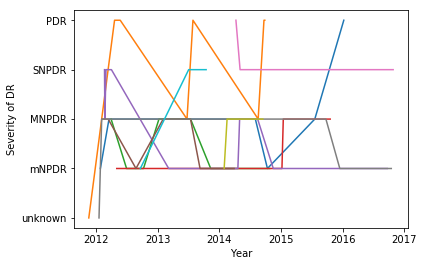

In [42]:
i=0
for k,v in d.items():
    t,l = f(v)
    plt.plot(t,l)
    i+=1
    if i>9:
        break
plt.yticks(range(0,5), ['unknown', 'mNPDR', 'MNPDR', 'SNPDR', 'PDR'])
plt.ylabel('Severity of DR')
plt.xlabel('Year')
#plt.savefig('hhh.jpg')
plt.show()